In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
%matplotlib inline

# Version 1

1    386
0    362
Name: score, dtype: int64
Number of mislabeled points out of a total 748 points : 316
The model accurately classified as postive/negative by   57.75401069518716


array([0.53947368, 0.52631579, 0.62666667, 0.61333333, 0.58666667,
       0.57333333, 0.62162162, 0.55405405, 0.52702703, 0.51351351])

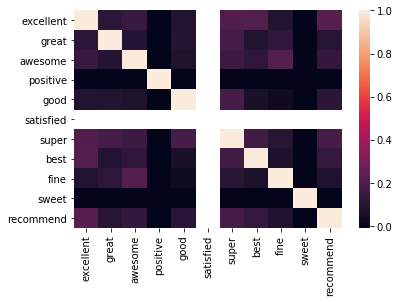

In [27]:
#Key words or positive_words are given below
data = pd.read_csv(r'sentiment_labelled_sentences/imdb_labelled.txt', sep='\t', header=None, names=('sentence', 'score'))

positive_words = ['excellent', 'great',  'awesome', 'positive', 'good', 'satisfied', 'super', 
                  'best', 'fine', 'sweet', 'recommend']
for key in positive_words:
   
    data[str(key)] = data.sentence.str.contains(
        str(key),
        case=False
    )
data['score'] = np.where(data['score']==1, 'Positive', 'Negative')

sns.heatmap(data.corr())
data_input = data[positive_words]
target = data['score']

# data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_input, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_input)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_input.shape[0],
    (target != y_pred).sum()
))
print ("The model accurately classified as postive/negative by  ", (1-((target != y_pred).sum()/data_input.shape[0]))*100)

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_input, target, cv=10)

# Version 2 - Variables made sure are independent

1    386
0    362
Name: score, dtype: int64
Number of mislabeled points out of a total 748 points : 316
The model accurately classified as postive/negative by   57.75401069518716


array([0.53947368, 0.52631579, 0.62666667, 0.61333333, 0.58666667,
       0.57333333, 0.62162162, 0.55405405, 0.52702703, 0.51351351])

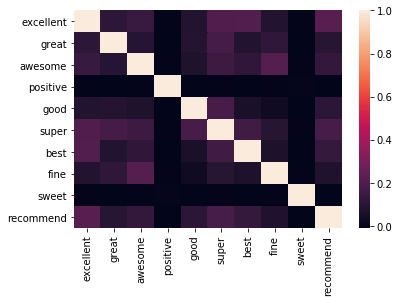

In [29]:
#Key words or positive_words are given below
data = pd.read_csv(r'sentiment_labelled_sentences/imdb_labelled.txt', sep='\t', header=None, names=('sentence', 'score'))
# checking if there is a class imbalance since it poses a big problem in classification
print (data['score'].value_counts())

positive_words = ['excellent', 'great',  'awesome', 'positive', 'good', 'super', 
                  'best', 'fine', 'sweet', 'recommend']
for key in positive_words:
   
    data[str(key)] = data.sentence.str.contains(
        str(key),
        case=False
    )
data['score'] = np.where(data['score']==1, 'Positive', 'Negative')

sns.heatmap(data.corr())
data_input = data[positive_words]
target = data['score']

# data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_input, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_input)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_input.shape[0],
    (target != y_pred).sum()
))
print ("The model accurately classified as postive/negative by  ", (1-((target != y_pred).sum()/data_input.shape[0]))*100)

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_input, target, cv=10)

# Version 3 - Added new features and removed poor features

1    386
0    362
Name: score, dtype: int64
Number of mislabeled points out of a total 748 points : 303
The model accurately classified as postive/negative by   59.491978609625676


array([0.53947368, 0.53947368, 0.64      , 0.61333333, 0.58666667,
       0.6       , 0.64864865, 0.56756757, 0.58108108, 0.55405405])

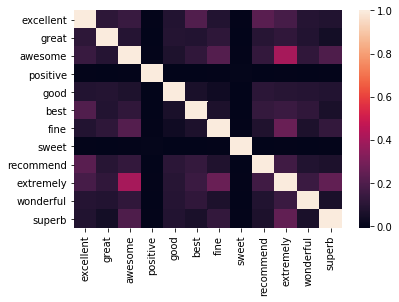

In [34]:
#Key words or positive_words are given below
data = pd.read_csv(r'sentiment_labelled_sentences/imdb_labelled.txt', sep='\t', header=None, names=('sentence', 'score'))
# checking if there is a class imbalance since it poses a big problem in classification
print (data['score'].value_counts())

positive_words = ['excellent', 'great',  'awesome', 'positive', 'good', 
                  'best', 'fine', 'sweet', 'recommend', 'extremely', 'wonderful', 'superb']
for key in positive_words:
   
    data[str(key)] = data.sentence.str.contains(
        str(key),
        case=False
    )
data['score'] = np.where(data['score']==1, 'Positive', 'Negative')

sns.heatmap(data.corr())
data_input = data[positive_words]
target = data['score']

# data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_input, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_input)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_input.shape[0],
    (target != y_pred).sum()
))
print ("The model accurately classified as postive/negative by  ", (1-((target != y_pred).sum()/data_input.shape[0]))*100)

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_input, target, cv=10)

Do any of your classifiers seem to overfit?
None of them overfit...since the crossvalidation scores are not very different from each other

Which seem to perform the best? Why?
The version 3 is the best because we made sure the variables are independent, which is a requisite for NB classifier and also added more features and removed poor features


Which features seemed to be most impactful to performance?
positive_words = ['excellent', 'great',  'awesome', 'positive', 'good', 
                  'best', 'fine', 'sweet', 'recommend', 'extremely', 'wonderful', 'superb']

